In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from benchmarks.runs.exploring_utils import RunAnalyser, adaptive_filter, non_adaptive_filter, model_filter

In [2]:
run_path = '../'
test_name = 'Burgers_1+1D'

test_path = os.path.join(run_path, test_name)

In [3]:
runs = sorted([m for m in os.listdir(test_path) if os.path.isdir(os.path.join(test_path, m))])
runs

['CKAN_16',
 'CKAN_32',
 'CKAN_64',
 'CKAN_8',
 'CKAN_A_16',
 'CKAN_A_32',
 'CKAN_A_8',
 'FCN_(16, 16)',
 'FCN_(32, 32)',
 'FCN_(8, 8)',
 'FCN_32',
 'FCN_8',
 'FCN_A_32',
 'FCN_A_8',
 'LKAN_16',
 'LKAN_32',
 'LKAN_64',
 'LKAN_8',
 'LKAN_A_16',
 'LKAN_A_32',
 'LKAN_A_8',
 'StackedCKAN_deg[4, 4, 4, 4, 4]_h[4, 4, 4, 4]',
 'StackedCKAN_deg[4, 4, 4, 4]_h[4, 4, 4]',
 'StackedCKAN_deg[4, 4, 4]_h[4, 4]',
 'StackedCKAN_deg[4, 4]_h[10]',
 'StackedCKAN_deg[4, 4]_h[2]',
 'StackedCKAN_deg[4, 4]_h[4]',
 'StackedCKAN_deg[4, 4]_h[6]',
 'StackedCKAN_deg[4, 4]_h[8]',
 'StackedLKAN_deg[4, 4]_h[10]']

In [4]:
analyser = RunAnalyser(runs, test_path)

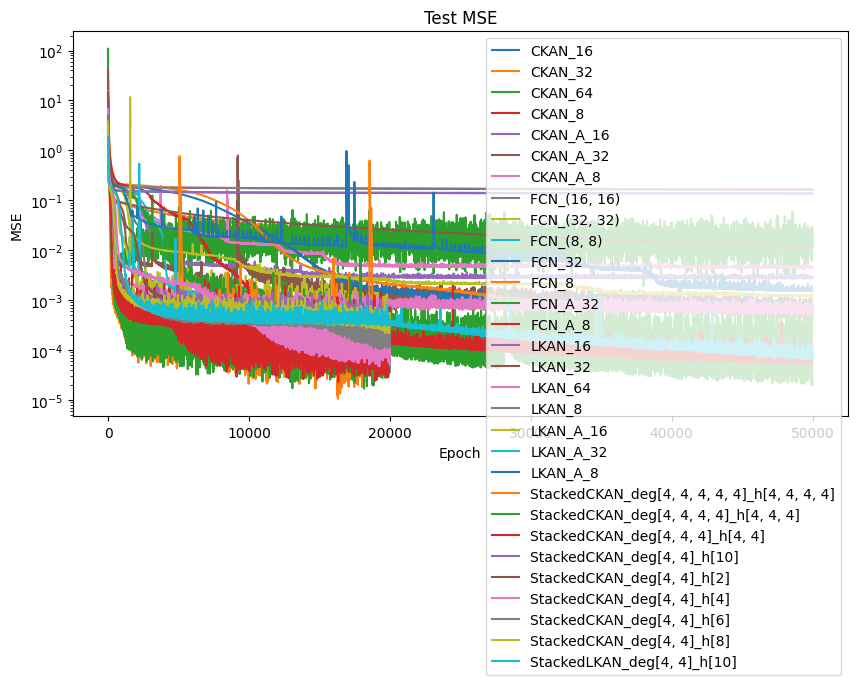

In [12]:
# Plot all models
analyser.plot_mses()
# analyser.get_late_variances()

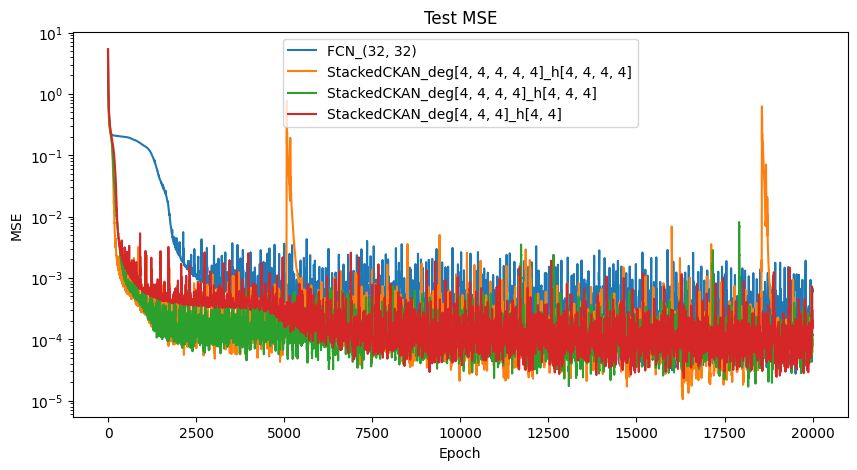

In [24]:
# analyser.plot_mses(filter=adaptive_filter), analyser.plot_mses(filter=non_adaptive_filter)
analyser.plot_mses(filter=lambda x: 'StackedCKAN_deg[4, 4, 4' in x or 'FCN_(32, 32)' in x)

# Non-adaptive analysis

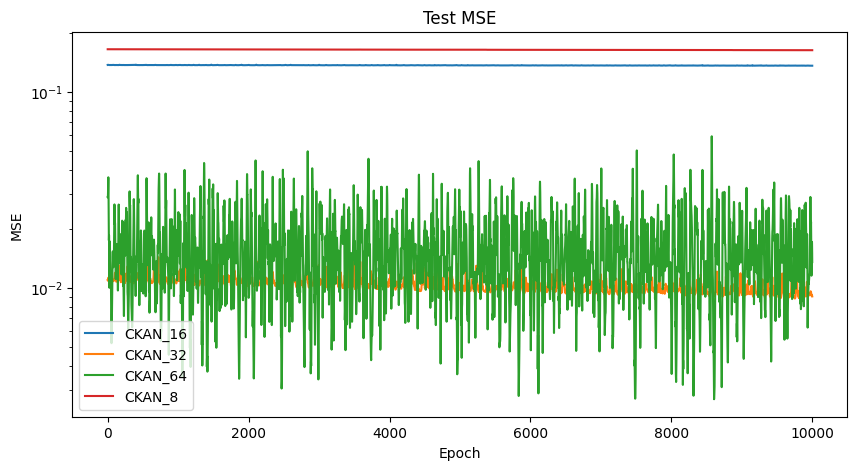

In [7]:
non_adaptive_ckans = lambda x: model_filter(x, 'CKAN') and non_adaptive_filter(x)# and '_128' not in x and '_8' not in x
analyser.plot_mses(filter=non_adaptive_ckans, start=40000)

CKAN_8 is best

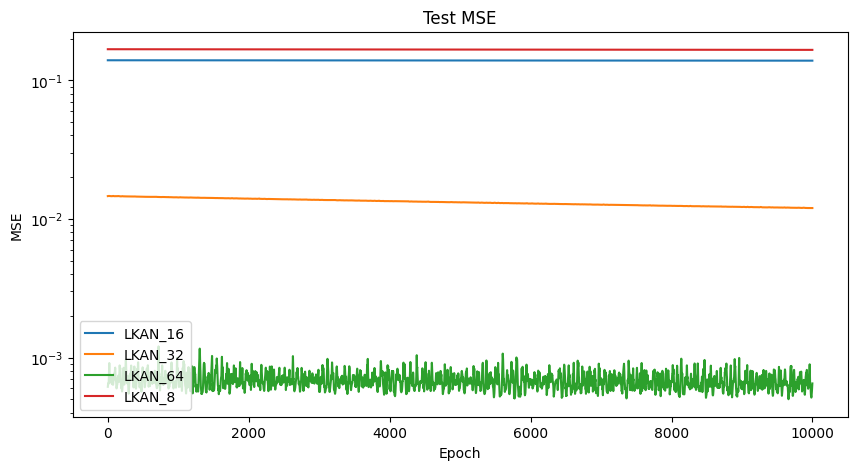

{'LKAN_16': 7.846633462098041e-07,
 'LKAN_32': 1.6128961773666933e-06,
 'LKAN_64': 1.3050197569461707e-05,
 'LKAN_8': 5.121936987895872e-07}

In [8]:
non_adaptive_lkans = lambda x: model_filter(x, 'LKAN') and non_adaptive_filter(x)
analyser.plot_mses(filter=non_adaptive_lkans, start=40000)
analyser.get_mean_absolute_change(filter=non_adaptive_lkans, start=40000)

16 and 32 are same but 16 is more stable. 8 is also good

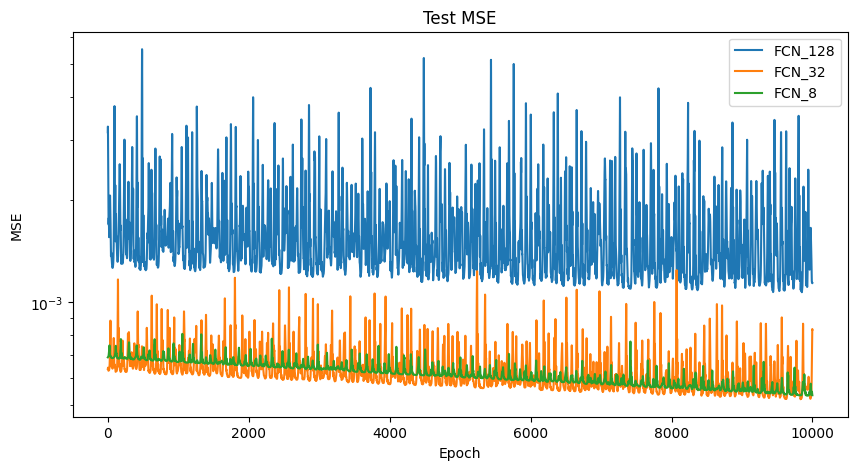

{'FCN_128': 6.182439554848186e-05,
 'FCN_32': 9.621394171223681e-06,
 'FCN_8': 2.0418382046817063e-06}

In [9]:
non_adaptive_fcns = lambda x: model_filter(x, 'FCN') and non_adaptive_filter(x) #and '_128' not in x
analyser.plot_mses(filter=non_adaptive_fcns, start=40000)
analyser.get_mean_absolute_change(filter=non_adaptive_fcns, start=40000)

FCN 8 and 32 are best but 32 is very unstable

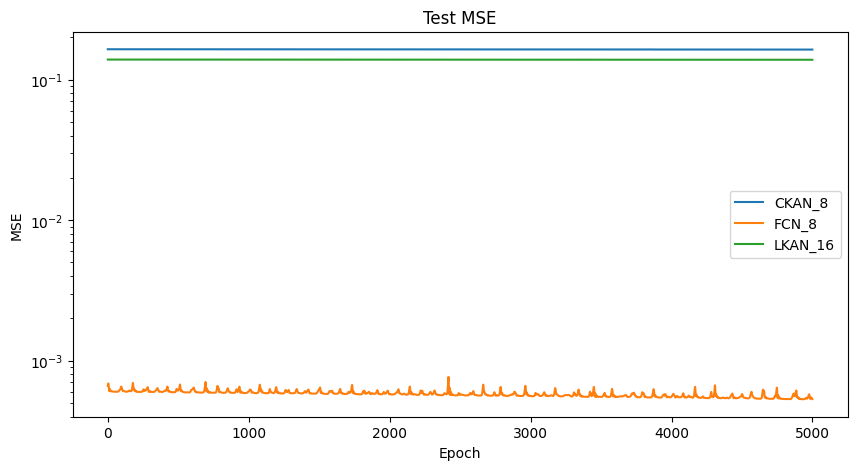

In [10]:
d = ['FCN_8', 'CKAN_8', 'LKAN_16']
f = lambda x: x in d
analyser.plot_mses(filter=f, start=45000)

ckan slightly wins

# Adaptive analysis

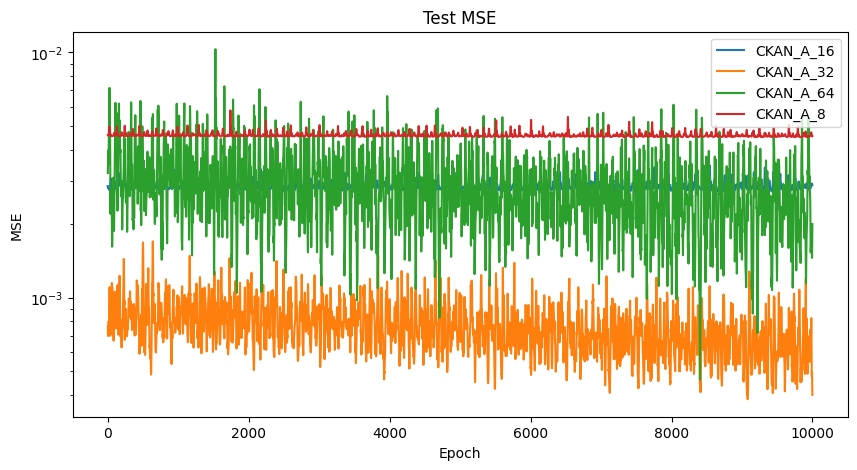

In [11]:
adaptive_ckans = lambda x: model_filter(x, 'CKAN') and adaptive_filter(x)# and '_128' not in x and '_8' not in x
analyser.plot_mses(filter=adaptive_ckans, start=40000)

8 is best, 16 is good

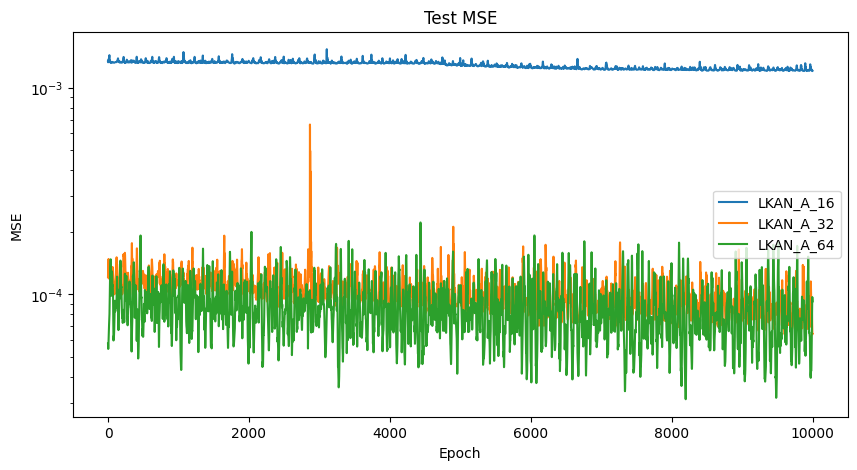

In [12]:
adaptive_lkans = lambda x: model_filter(x, 'LKAN') and adaptive_filter(x) and '_128' not in x and '_8' not in x #  and '_8' not in x
analyser.plot_mses(filter=adaptive_lkans, start=40000)

16 is best and most stable

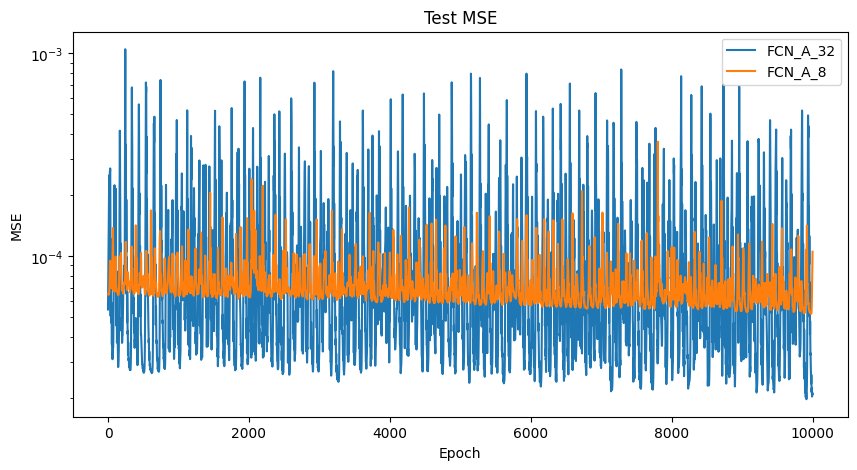

In [13]:
adaptive_fcns = lambda x: model_filter(x, 'FCN') and adaptive_filter(x) #and '_128' not in x
analyser.plot_mses(filter=adaptive_fcns, start=40000)

128 is best but very unstable, 8 is better bet

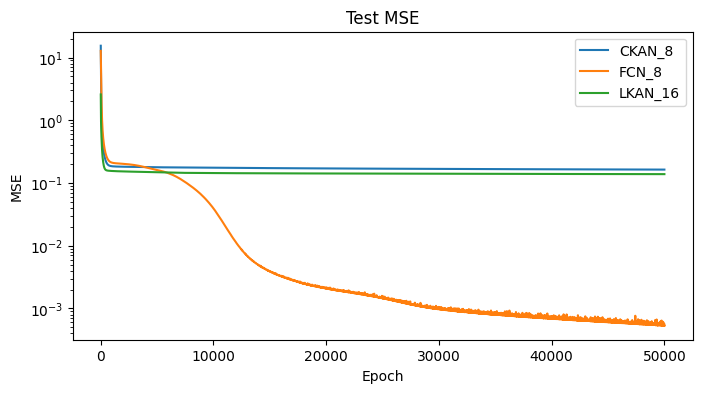

In [14]:
d = ['FCN_8', 'CKAN_8', 'LKAN_16']
f = lambda x: x in d
analyser.plot_mses(filter=f, figsize=(8, 4))

ckan wins again, also least parameters

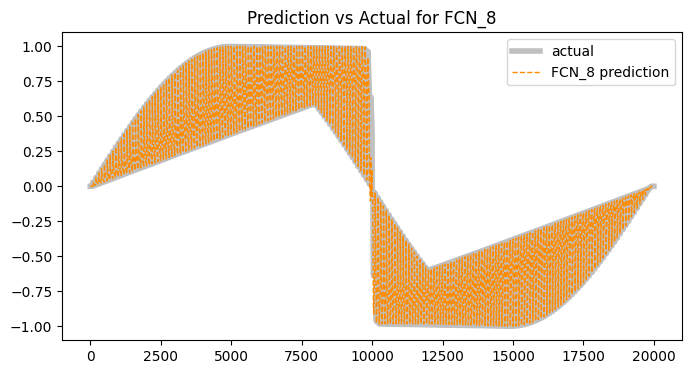

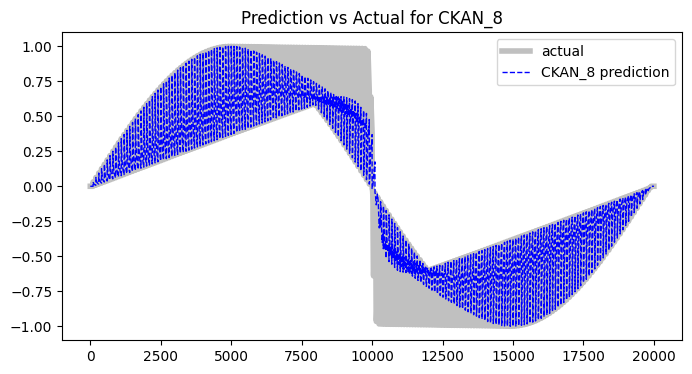

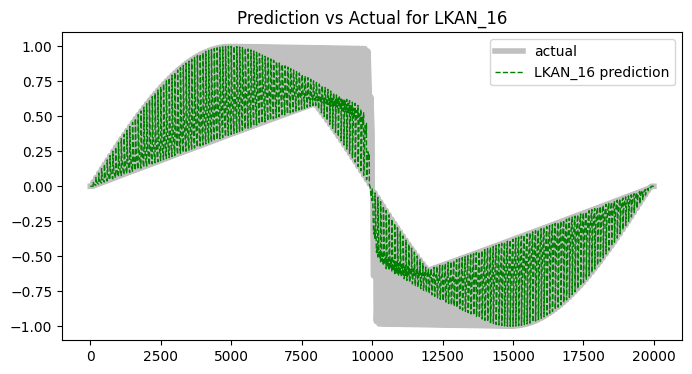

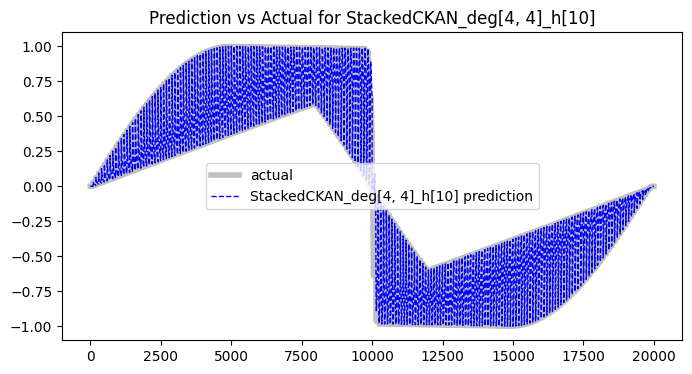

In [11]:
models = ['FCN_8', 'CKAN_8', 'LKAN_16', 'StackedCKAN_deg[4, 4]_h[10]']
colors = ['darkorange', 'blue', 'green', 'blue']
analyser.plot_prediction_over_actual_1D(models, colors=colors, epoch=20000, figsize=(8, 4), exact_color='silver')

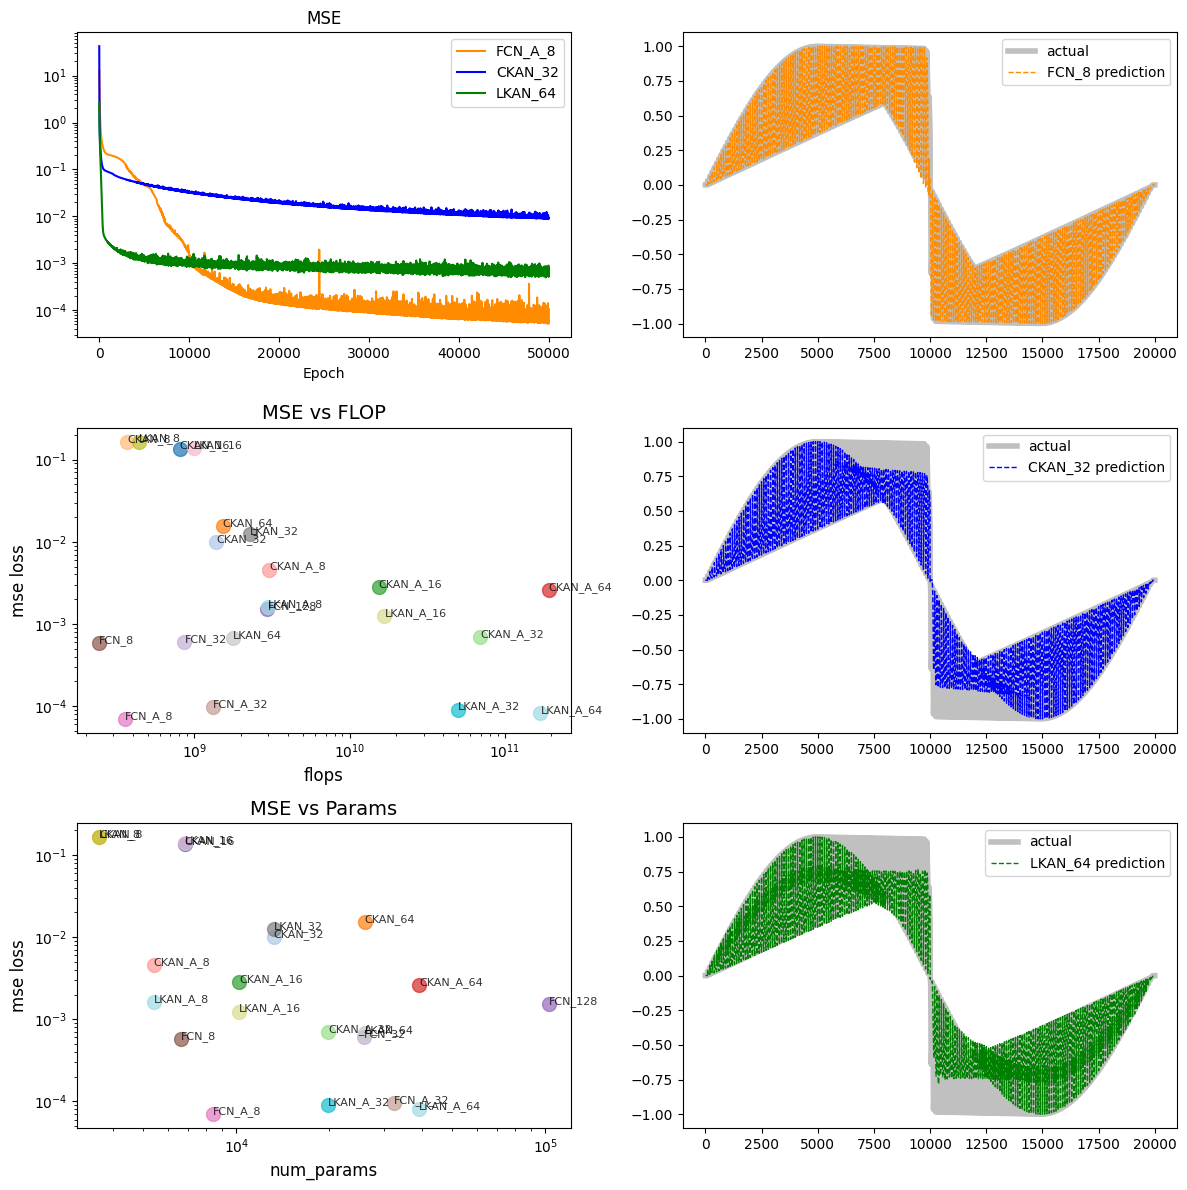

In [21]:
plt.figure(figsize=(12, 12))

plt.subplot(3,2,1)
plt.semilogy(analyser.mses['FCN_A_8'], label='FCN_A_8', color='darkorange')
plt.semilogy(analyser.mses['CKAN_32'], label='CKAN_32', color='blue')
plt.semilogy(analyser.mses['LKAN_64'], label='LKAN_64', color='green')
plt.title('MSE')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(3,2,3)
analyser.plot_mse_over_flops(noshow=True, legend=False)

plt.subplot(3,2,5)
analyser.plot_mse_over_params(noshow=True, legend=False)

pred_file = f'test_50000.npy'
exact_file = 'test_exact.npy'

plt.subplot(3,2,2)
pred = np.load(os.path.join(test_path, 'FCN_8', pred_file))
exact = np.load(os.path.join(test_path, 'FCN_8', exact_file))
plt.plot(exact, label='actual', linestyle='-', lw=4, color='silver')
plt.plot(pred, label=f'FCN_8 prediction', linestyle='--', color='darkorange', linewidth=1)
plt.legend()

plt.subplot(3,2,4)
pred = np.load(os.path.join(test_path, 'CKAN_32', pred_file))
exact = np.load(os.path.join(test_path, 'CKAN_32', exact_file))
plt.plot(exact, label='actual', linestyle='-', lw=4, color='silver')
plt.plot(pred, label=f'CKAN_32 prediction', linestyle='--', color='blue', linewidth=1)
plt.legend()

plt.subplot(3,2,6)
pred = np.load(os.path.join(test_path, 'LKAN_64', pred_file))
exact = np.load(os.path.join(test_path, 'LKAN_64', exact_file))
plt.plot(exact, label='actual', linestyle='-', lw=4, color='silver')
plt.plot(pred, label=f'LKAN_64 prediction', linestyle='--', color='green', linewidth=1)
plt.legend()

plt.tight_layout()
plt.show()